In [1]:
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import numpy as np

In [2]:
original = pd.read_csv('/Users/andreza/Downloads/union_paths.csv')


In [3]:
manaus7 = pd.read_csv('/Users/andreza/Downloads/FF_Manaus_hubs7.csv')
manaus4 = pd.read_csv('/Users/andreza/Downloads/FF_Manaus_hubs4.csv')

In [4]:
recife1 = pd.read_csv('/Users/andreza/Downloads/FF_Recife_1.csv')
recife4 = pd.read_csv('/Users/andreza/Downloads/FF_Recife_4.csv')

In [5]:
sp1 = pd.read_csv('/Users/andreza/Downloads/FF_Sao_Paulo_1.csv')
sp6 = pd.read_csv('/Users/andreza/Downloads/FF_Sao_Paulo_6.csv')

In [6]:
rio12 =pd.read_csv('/Users/andreza/Downloads/FF_Rio_12.csv')
rio6 = pd.read_csv('/Users/andreza/Downloads/FF_Rio_6.csv')

In [7]:
#Recife [1/4],  SP [1/ 6], Rio [12/6], Manaus [7/4], Salvador [1/5]

In [8]:
correspondencia_muni = pd.read_csv('/Users/andreza/reproducibility_transportation_hubs-early_warning_surveillance_systems/data/correspondencia.csv')

In [9]:
# correspondencia_muni

In [10]:
# manaus7.head(8)

In [28]:
# manaus7.count()

In [12]:
# manaus4.head(8)


In [27]:
# manaus4.count()

## Análise baseada no primeiro passo

In [53]:
#Recife [1/4],  SP [1/ 6], Rio [12/6], Manaus [7/4], Salvador [1/5]
# df1 = manaus7
# df2 = manaus4
# df1 = recife1
# df2 = recife4
# df1 = sp1
# df2 = sp6
df1 = rio12
df2 = rio6

In [54]:
# # Primeiro, vamos fazer o merge baseado apenas nos códigos IBGE, pois os nomes dos municípios e estados já deveriam ser consistentes para esses códigos
# merged_df = pd.merge(df1, df2, on=['ori_co_ibge', 'des_co_ibge'], suffixes=('_alta', '_baixa'))

# # Filtra as linhas onde 'muni_1' é diferente entre alta e baixa temporada
# different_muni_1 = merged_df[merged_df['muni_1_alta'] != merged_df['muni_1_baixa']]

# # Seleciona colunas de interesse
# final_df = different_muni_1[['ori_co_ibge', 'des_co_ibge', 
#                              'muni_1_alta', 'muni_1_baixa', 
#                              'ori_muni_name_alta', 'ori_uf_name_alta', 
#                              'des_muni_name_alta', 'des_uf_name_alta']]

# # Exibe o resultado final
# print(final_df)


In [55]:
# Primeiro merge entre df1 e df2
merged_df1_df2 = pd.merge(df1, df2, on=['ori_co_ibge', 'des_co_ibge'], suffixes=('_alta', '_baixa'))

# Segundo merge: o resultado do primeiro merge com o DataFrame original
merged_final = pd.merge(merged_df1_df2, original, on=['ori_co_ibge', 'des_co_ibge'], suffixes=('',''))

# Filtra as linhas onde 'muni_1' é diferente entre alta, baixa temporada, [e o original???]
different_muni_1 = merged_final[(merged_final['muni_1_alta'] != merged_final['muni_1_baixa'])  
#                                 | (merged_final['muni_1_alta'] != merged_final['muni_1']) |
#                                 (merged_final['muni_1_baixa'] != merged_final['muni_1'])
                               ]

In [65]:
merged_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2202 entries, 0 to 2201
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0_alta      2202 non-null   int64  
 1   value_cum_alta       2202 non-null   float64
 2   value_alta           2202 non-null   float64
 3   ori_muni_name_alta   2202 non-null   object 
 4   ori_uf_name_alta     2202 non-null   object 
 5   ori_co_ibge          2202 non-null   int64  
 6   des_muni_name_alta   2202 non-null   object 
 7   des_uf_name_alta     2202 non-null   object 
 8   des_co_ibge          2202 non-null   int64  
 9   path_correct_alta    2202 non-null   object 
 10  path_len_alta        2202 non-null   int64  
 11  muni_1_alta          2202 non-null   int64  
 12  muni_2_alta          2188 non-null   float64
 13  muni_3_alta          1232 non-null   float64
 14  ones_alta            2202 non-null   int64  
 15  Unnamed: 0_baixa     2202 non-null   i

In [57]:

# Seleciona colunas de interesse, incluindo informações do DataFrame original
final_df = different_muni_1[['ori_co_ibge', 'des_co_ibge', 
                             'muni_1_alta', 'muni_1_baixa', 'muni_1',
                             'ori_muni_name_alta', 'ori_uf_name_alta', 
                             'des_muni_name_alta', 'des_uf_name_alta',
                             'ori_muni_name', 'ori_uf_name', 
                             'des_muni_name', 'des_uf_name']]

# Exibe o resultado final
# print(final_df)


In [58]:
# df_Final.to_csv('/Users/andreza/Downloads/df_final.csv')

In [59]:
df_Final = final_df
correspondencia_df = correspondencia_muni
# Criar um dicionário para mapear muni_number para "Nome_Município, Nome_UF"
correspondencia_df['Nome_Município_UF'] = correspondencia_df['Nome_Município'] + ', ' + correspondencia_df['Nome_UF']
muni_para_nome_uf = correspondencia_df.set_index('muni_number')['Nome_Município_UF'].to_dict()


# Aplicar o mapeamento para associar os nomes dos municípios
df_Final['muni_1_nome_uf_alta'] = df_Final['muni_1_alta'].map(muni_para_nome_uf)
df_Final['muni_1_nome_uf_baixa'] = df_Final['muni_1_baixa'].map(muni_para_nome_uf)
df_Final['muni_1_nome_uf'] = df_Final['muni_1'].map(muni_para_nome_uf)


# Exibir as primeiras linhas do df_Final para verificar o resultado
# print(df_Final.head())


/Users/andreza/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/andreza/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/andreza/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [60]:
# final_df

In [61]:
# Conta a frequência de cada município na coluna 'muni_1_nome_uf_alta' para alta temporada
muni_counts_alta_nome_uf = final_df['muni_1_nome_uf_alta'].value_counts()

# Conta a frequência de cada município na coluna 'muni_1_nome_uf_baixa' para baixa temporada
muni_counts_baixa_nome_uf = final_df['muni_1_nome_uf_baixa'].value_counts()

# Conta a frequência de cada município na coluna 'muni_1_nome_uf' para o df original
muni_counts_original_nome_uf = final_df['muni_1_nome_uf'].value_counts()

# Exibe os resultados, incluindo os nomes dos municípios e UFs
print("Contagem de municípios na alta temporada (com nomes e UFs):\n", muni_counts_alta_nome_uf)
print("\nContagem de municípios na baixa temporada (com nomes e UFs):\n", muni_counts_baixa_nome_uf)
print("\nContagem de municípios no original (com nomes e UFs):\n", muni_counts_original_nome_uf)

# Para ver os municípios mais frequentes, você pode usar .head(n) onde n é o número de top municípios que você quer ver
print("\nTop 5 municípios na alta temporada (com nomes e UFs):\n", muni_counts_alta_nome_uf.head(5))
print("\nTop 5 municípios na baixa temporada (com nomes e UFs):\n", muni_counts_baixa_nome_uf.head(5))
print("\nTop 5 municípios no original (com nomes e UFs):\n", muni_counts_original_nome_uf.head(5))



Contagem de municípios na alta temporada (com nomes e UFs):
 São Paulo, São Paulo                            26
Florianópolis, Santa Catarina                   22
Curitiba, Paraná                                22
Cascavel, Paraná                                21
Goiânia, Goiás                                  21
Barra Mansa, Rio de Janeiro                     18
Guarapuava, Paraná                              18
Belo Horizonte, Minas Gerais                    18
Uberlândia, Minas Gerais                        16
Campinas, São Paulo                             16
Brasília, Distrito Federal                      15
Londrina, Paraná                                12
Itapeva, São Paulo                              12
Uberaba, Minas Gerais                           12
Salvador, Bahia                                 12
Presidente Prudente, São Paulo                  12
Porto Alegre, Rio Grande do Sul                 10
Teresina, Piauí                                  9
Foz do Iguaçu, Paraná

In [62]:
# final_df.info()

In [63]:
# Conta a frequência de cada município
muni_counts_alta_nome_uf = final_df['muni_1_nome_uf_alta'].value_counts()
muni_counts_baixa_nome_uf = final_df['muni_1_nome_uf_baixa'].value_counts()
# muni_counts_original_nome_uf = final_df['muni_1_nome_uf'].value_counts()

# Calcula a porcentagem da frequência em relação ao total de linhas
total_linhas = len(merged_final) #final_df
muni_percent_alta = (muni_counts_alta_nome_uf / total_linhas) * 100
muni_percent_baixa = (muni_counts_baixa_nome_uf / total_linhas) * 100
# muni_percent_original = (muni_counts_original_nome_uf / total_linhas) * 100

# Obtém o ranking dos municípios para cada temporada
muni_rank_alta = muni_counts_alta_nome_uf.rank(ascending=False, method='min')
muni_rank_baixa = muni_counts_baixa_nome_uf.rank(ascending=False, method='min')

# Combina os rankings em um DataFrame
rankings = pd.DataFrame({
    'Alta Temporada': muni_rank_alta,
    'Baixa Temporada': muni_rank_baixa
})

# Encontra os municípios que mudaram de posição
rankings['Mudança de Posição'] = rankings['Alta Temporada'] - rankings['Baixa Temporada']

# Filtra os municípios com mudança de posição
municipios_mudanca = rankings[rankings['Mudança de Posição'] != 0]

print("Municípios que mudaram de posição no rankeamento:\n", municipios_mudanca)
print("\nPercentual de frequência para a alta temporada:\n", muni_percent_alta)
print("\nPercentual de frequência para a baixa temporada:\n", muni_percent_baixa)
# print("\nPercentual de frequência para o período original:\n", muni_percent_original)


Municípios que mudaram de posição no rankeamento:
                                               Alta Temporada  Baixa Temporada  \
Alto Araguaia, Mato Grosso                               NaN             30.0   
Anápolis, Goiás                                          NaN             26.0   
Aracaju, Sergipe                                        40.0              NaN   
Assis, São Paulo                                        31.0             30.0   
Barbacena, Minas Gerais                                 31.0             30.0   
Barra Mansa, Rio de Janeiro                              6.0              8.0   
Belo Horizonte, Minas Gerais                             6.0              3.0   
Belém, Pará                                              NaN             22.0   
Bom Jesus do Norte, Espírito Santo                      26.0             22.0   
Brasília, Distrito Federal                              11.0             10.0   
Campina Grande, Paraíba                                 31

In [64]:
# Conta a frequência de cada município
muni_counts_alta_nome_uf = final_df['muni_1_nome_uf_alta'].value_counts()
muni_counts_baixa_nome_uf = final_df['muni_1_nome_uf_baixa'].value_counts()
# muni_counts_original_nome_uf = final_df['muni_1_nome_uf'].value_counts()

# Calcula a porcentagem da frequência em relação ao total de linhas
total_linhas = len(merged_final) #final_df
muni_percent_alta = (muni_counts_alta_nome_uf / total_linhas) * 100
muni_percent_baixa = (muni_counts_baixa_nome_uf / total_linhas) * 100

# Obtém o ranking dos municípios para cada temporada
muni_rank_alta = muni_counts_alta_nome_uf.rank(ascending=False, method='min')
muni_rank_baixa = muni_counts_baixa_nome_uf.rank(ascending=False, method='min')

# Combina os rankings em um DataFrame
rankings = pd.DataFrame({
    'Rank Alta Temporada': muni_rank_alta,
    'Rank Baixa Temporada': muni_rank_baixa,
    'Percentual Alta': muni_percent_alta,
    'Percentual Baixa': muni_percent_baixa
}).fillna(0)  # Preenche NaN com 0 para municípios que não aparecem em uma das temporadas

# Encontra os municípios que mudaram de posição
rankings['Mudança de Posição'] = rankings['Rank Alta Temporada'] - rankings['Rank Baixa Temporada']

# Filtra os municípios com mudança de posição
municipios_mudanca = rankings[rankings['Mudança de Posição'] != 0]

# Calcula o somatório dos percentuais referentes aos municípios que mudaram de posição na alta e na baixa temporada
soma_percentual_alta = municipios_mudanca['Percentual Alta'].sum()
soma_percentual_baixa = municipios_mudanca['Percentual Baixa'].sum()

print("Municípios que mudaram de posição no rankeamento:\n", municipios_mudanca)
print("\nSomatório do percentual dos municípios que mudaram de posição na alta temporada: {:.2f}%".format(soma_percentual_alta))
print("Somatório do percentual dos municípios que mudaram de posição na baixa temporada: {:.2f}%".format(soma_percentual_baixa))


Municípios que mudaram de posição no rankeamento:
                                               Rank Alta Temporada  \
Alto Araguaia, Mato Grosso                                    0.0   
Anápolis, Goiás                                               0.0   
Aracaju, Sergipe                                             40.0   
Assis, São Paulo                                             31.0   
Barbacena, Minas Gerais                                      31.0   
Barra Mansa, Rio de Janeiro                                   6.0   
Belo Horizonte, Minas Gerais                                  6.0   
Belém, Pará                                                   0.0   
Bom Jesus do Norte, Espírito Santo                           26.0   
Brasília, Distrito Federal                                   11.0   
Campina Grande, Paraíba                                      31.0   
Campinas, São Paulo                                           9.0   
Campo Grande, Mato Grosso do Sul                    

### Manaus 
Municípios que mudaram de posição no rankeamento:
                                 Rank Alta Temporada  Rank Baixa Temporada  \
Belém, Pará                                     7.0                   6.0   
Campinas, São Paulo                             4.0                   2.0   
Fortaleza, Ceará                                1.0                   9.0   
Recife, Pernambuco                              6.0                   4.0   
Rio de Janeiro, Rio de Janeiro                  9.0                   8.0   
Santarém, Pará                                  8.0                   7.0   

                                Percentual Alta  Percentual Baixa  \
Belém, Pará                            1.002950          1.474926   
Campinas, São Paulo                    4.306785          4.424779   
Fortaleza, Ceará                       5.899705          0.412979   
Recife, Pernambuco                     1.179941          2.772861   
Rio de Janeiro, Rio de Janeiro         0.648968          0.648968   
Santarém, Pará                         0.766962          0.766962   

                                Mudança de Posição  
Belém, Pará                                    1.0  
Campinas, São Paulo                            2.0  
Fortaleza, Ceará                              -8.0  
Recife, Pernambuco                             2.0  
Rio de Janeiro, Rio de Janeiro                 1.0  
Santarém, Pará                                 1.0  


Somatório do percentual dos municípios que mudaram de posição na alta temporada: 13.81%
Somatório do percentual dos municípios que mudaram de posição na baixa temporada: 10.50%

### Recife 

Somatório do percentual dos municípios que mudaram de posição na alta temporada: 13.73%
Somatório do percentual dos municípios que mudaram de posição na baixa temporada: 13.68%

### SP
Somatório do percentual dos municípios que mudaram de posição na alta temporada: 8.76%
Somatório do percentual dos municípios que mudaram de posição na baixa temporada: 8.73%

### Rio
Somatório do percentual dos municípios que mudaram de posição na alta temporada: 15.53%
Somatório do percentual dos municípios que mudaram de posição na baixa temporada: 15.67%


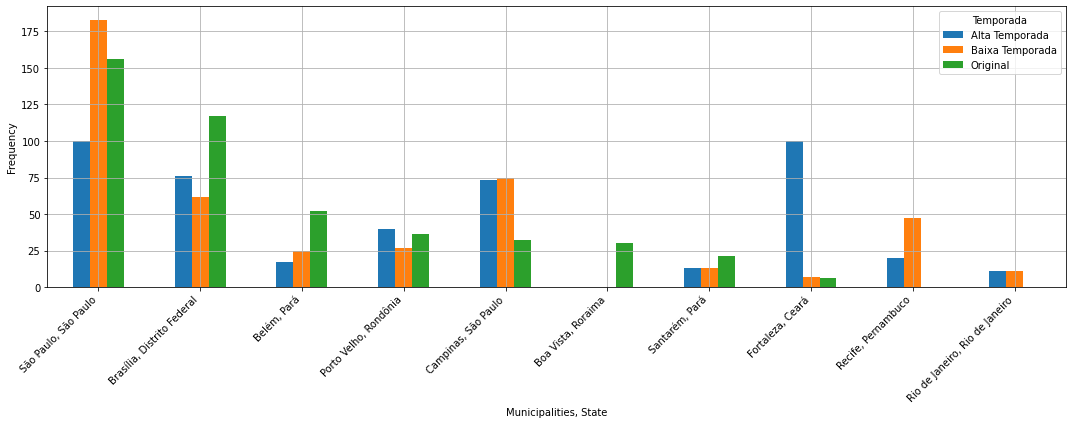

In [167]:
import matplotlib.pyplot as plt
import pandas as pd

muni_counts_alta = muni_counts_alta_nome_uf
muni_counts_baixa = muni_counts_baixa_nome_uf
muni_counts_original = muni_counts_original_nome_uf

# Cria um DataFrame a partir das Series
df_counts = pd.DataFrame({'Alta Temporada': muni_counts_alta, 'Baixa Temporada': muni_counts_baixa, 'Original': muni_counts_original})

#ordenar DF em ordem decrescente
df_counts = df_counts.sort_values(by='Original', ascending=False)

# Plot
df_counts.plot(kind='bar', figsize=(15, 6))

plt.title('')
plt.xlabel('Municipalities, State')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha="right")  # Melhorar a apresentação dos rótulos do eixo x
plt.tight_layout()  # Ajusta automaticamente os parâmetros do subplot
plt.legend(title='Temporada')
plt.grid()
plt.show()


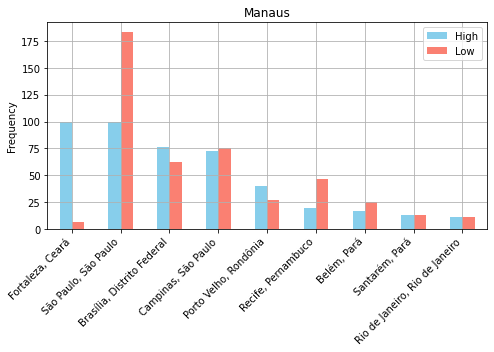

In [170]:
import matplotlib.pyplot as plt
import pandas as pd

muni_counts_alta = muni_counts_alta_nome_uf
muni_counts_baixa = muni_counts_baixa_nome_uf
# muni_counts_original = muni_counts_original_nome_uf

# Cria um DataFrame a partir das Series
df_counts = pd.DataFrame({'High': muni_counts_alta, 'Low': muni_counts_baixa})

# Seleciona os top 10 municípios com maior contagem para cada temporada e o período original
top_alta = df_counts['High'].nlargest(15).index
top_baixa = df_counts['Low'].nlargest(15).index
# top_original = df_counts['Original'].nlargest(15).index

# Combina os índices dos top 10 de cada temporada para obter um conjunto único de municípios
top_municipios = set(top_alta) | set(top_baixa) 
# | set(top_original)

# Filtra o DataFrame para incluir apenas os municípios selecionados
df_counts = df_counts.loc[df_counts.index.intersection(top_municipios)]

#ordenar DF em ordem decrescente
df_counts = df_counts.sort_values(by='High', ascending=False)

# Plot
df_counts.plot(kind='bar', figsize=(7, 5), color=['skyblue', 'salmon'])


plt.title('Manaus')
plt.xlabel('')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha="right")  # Melhorar a apresentação dos rótulos do eixo x
plt.tight_layout()  # Ajusta automaticamente os parâmetros do subplot
plt.legend(title='')
plt.grid()
plt.show()


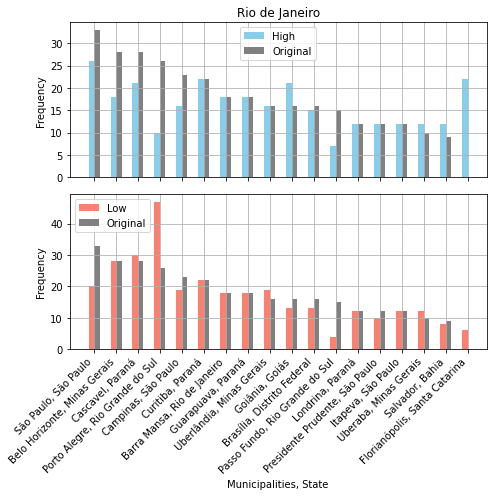

In [121]:
df_counts = pd.DataFrame({
    'Alta Temporada': muni_counts_alta_nome_uf,
    'Baixa Temporada': muni_counts_baixa_nome_uf,
    'Original': muni_counts_original_nome_uf
})

# Seleciona os top 10 municípios com maior contagem para cada temporada e o período original
top_alta = df_counts['Alta Temporada'].nlargest(15).index
top_baixa = df_counts['Baixa Temporada'].nlargest(15).index
top_original = df_counts['Original'].nlargest(15).index

# Combina os índices dos top 10 de cada temporada para obter um conjunto único de municípios
top_municipios = set(top_alta) | set(top_baixa) | set(top_original)

# Filtra o DataFrame para incluir apenas os municípios selecionados
df_counts = df_counts.loc[df_counts.index.intersection(top_municipios)]


# Ordenar o DataFrame em ordem decrescente com base nos valores originais
df_counts.sort_values(by='Original', ascending=False, inplace=True)

# Assegurar que os índices do DataFrame são os nomes dos municípios para a legenda do eixo x
df_counts.reset_index(inplace=True)

# Largura das barras
bar_width = 0.25

# Posições das barras no eixo x
index = np.arange(len(df_counts))

fig, ax = plt.subplots(2, 1, figsize=(7, 7), sharex=True)

# Barras para a alta temporada
ax[0].bar(index, df_counts['Alta Temporada'], bar_width, label='High', color='skyblue')

# Barras para o original no gráfico de alta temporada para comparação
ax[0].bar(index + bar_width, df_counts['Original'], bar_width, label='Original', color='grey')

ax[0].set_title('Rio de Janeiro')
ax[0].set_ylabel('Frequency')
ax[0].set_xticks(index + bar_width / 2)
ax[0].set_xticklabels(df_counts['index'], rotation=45, ha="right")
ax[0].grid()
ax[0].legend()

# Barras para a baixa temporada
ax[1].bar(index, df_counts['Baixa Temporada'], bar_width, label='Low', color='salmon')

# Barras para o original no gráfico de baixa temporada para comparação
ax[1].bar(index + bar_width, df_counts['Original'], bar_width, label='Original', color='grey')

ax[1].set_title('')
ax[1].set_xlabel('Municipalities, State')
ax[1].set_ylabel('Frequency')
ax[1].set_xticks(index + bar_width / 2)
ax[1].set_xticklabels(df_counts['index'], rotation=45, ha="right")
ax[1].grid()
ax[1].legend()

plt.tight_layout()
plt.show()



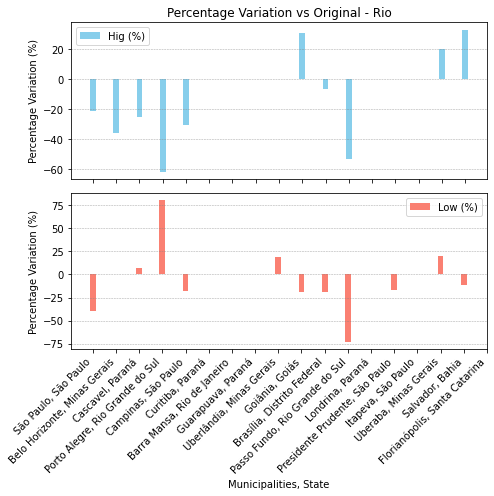

In [118]:
# TOP 10
# Cria um DataFrame a partir das Series
df_counts = pd.DataFrame({
    'Alta Temporada': muni_counts_alta_nome_uf,
    'Baixa Temporada': muni_counts_baixa_nome_uf,
    'Original': muni_counts_original_nome_uf
})

# Seleciona os top 10 municípios com maior contagem para cada temporada e o período original
top_alta = df_counts['Alta Temporada'].nlargest(15).index
top_baixa = df_counts['Baixa Temporada'].nlargest(15).index
top_original = df_counts['Original'].nlargest(15).index

# Combina os índices dos top 10 de cada temporada para obter um conjunto único de municípios
top_municipios = set(top_alta) | set(top_baixa) | set(top_original)

# Filtra o DataFrame para incluir apenas os municípios selecionados
df_counts = df_counts.loc[df_counts.index.intersection(top_municipios)]

# Calcula as variações percentuais
df_counts['Variação Alta (%)'] = ((df_counts['Alta Temporada'] - df_counts['Original']) / df_counts['Original']) * 100
df_counts['Variação Baixa (%)'] = ((df_counts['Baixa Temporada'] - df_counts['Original']) / df_counts['Original']) * 100

# Ordena o DataFrame pela contagem original
df_counts = df_counts.sort_values('Original', ascending=False)

# Prepara os índices das barras no eixo x
index = np.arange(len(df_counts))

# Cria os subplots para a alta e baixa temporada
fig, ax = plt.subplots(2, 1, figsize=(7, 7), sharex=True)

# Variação percentual para a alta temporada
ax[0].bar(index, df_counts['Variação Alta (%)'], bar_width, label='Hig (%)', color='skyblue')
ax[0].set_title('Percentage Variation vs Original - Rio')
ax[0].set_ylabel('Percentage Variation (%)')
ax[0].set_xticks(index)
ax[0].set_xticklabels(df_counts.index, rotation=45, ha="right")
ax[0].legend()
ax[0].grid(True, which='major', axis='y', linestyle='--', linewidth=0.5, color='grey', alpha=0.7)

# Variação percentual para a baixa temporada
ax[1].bar(index, df_counts['Variação Baixa (%)'], bar_width, label='Low (%)', color='salmon')
ax[1].set_title('')
ax[1].set_xlabel('Municipalities, State')
ax[1].set_ylabel('Percentage Variation (%)')
ax[1].set_xticks(index)
ax[1].set_xticklabels(df_counts.index, rotation=45, ha="right")
ax[1].legend()
ax[1].grid(True, which='major', axis='y', linestyle='--', linewidth=0.5, color='grey', alpha=0.7)

plt.tight_layout()
plt.show()


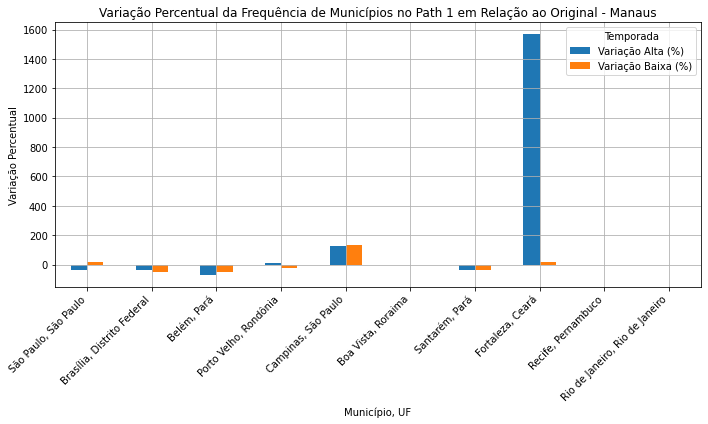

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Supondo que muni_counts_alta_nome_uf, muni_counts_baixa_nome_uf, e muni_counts_original_nome_uf já estejam definidos
muni_counts_alta = muni_counts_alta_nome_uf
muni_counts_baixa = muni_counts_baixa_nome_uf
muni_counts_original = muni_counts_original_nome_uf

# Cria um DataFrame a partir das Series
df_counts = pd.DataFrame({'Alta Temporada': muni_counts_alta, 'Baixa Temporada': muni_counts_baixa, 'Original': muni_counts_original})

# Calcular variação percentual em relação ao original
df_counts['Variação Alta (%)'] = ((df_counts['Alta Temporada'] - df_counts['Original']) / df_counts['Original']) * 100
df_counts['Variação Baixa (%)'] = ((df_counts['Baixa Temporada'] - df_counts['Original']) / df_counts['Original']) * 100

# Ordenar o DataFrame com base na coluna 'Original' em ordem decrescente
df_counts = df_counts.sort_values(by='Original', ascending=False)

# Preparar os dados para plotagem
df_counts_variacao = df_counts[['Variação Alta (%)', 'Variação Baixa (%)']]

# Plot da variação percentual
df_counts_variacao.plot(kind='bar', figsize=(10, 6))

plt.title('Variação Percentual da Frequência de Municípios no Path 1 em Relação ao Original - Manaus')
plt.xlabel('Município, UF')
plt.ylabel('Variação Percentual')
plt.xticks(rotation=45, ha="right")  # Melhorar a apresentação dos rótulos do eixo x
plt.tight_layout()
plt.grid()
plt.legend(title='Temporada')
plt.show()

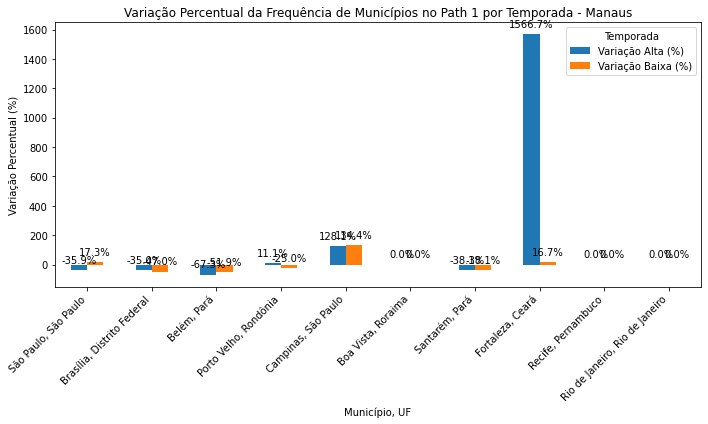

In [20]:
# Continuação do código anterior
# Plot da variação percentual com anotações
fig, ax = plt.subplots(figsize=(10, 6))

# Desenha as barras e guarda o retorno para adicionar anotações depois
barras = df_counts_variacao.plot(kind='bar', ax=ax)

plt.title('Variação Percentual da Frequência de Municípios no Path 1 por Temporada - Manaus')
plt.xlabel('Município, UF')
plt.ylabel('Variação Percentual (%)')
plt.xticks(rotation=45, ha="right")  # Melhorar a apresentação dos rótulos do eixo x
plt.tight_layout()  # Ajusta automaticamente os parâmetros do subplot
plt.legend(title='Temporada')

# Adicionar anotações de texto em cada barra
for p in barras.patches:
    ax.annotate(f"{p.get_height():.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


In [22]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np

# muni_counts_alta = muni_counts_alta_nome_uf
# muni_counts_baixa = muni_counts_baixa_nome_uf
# muni_counts_original = muni_counts_original_nome_uf

# # Unificando os índices
# index_unico = muni_counts_alta.index.union(muni_counts_baixa.index).union(muni_counts_original.index)

# # Reindexando as séries para garantir que todas tenham o mesmo índice
# muni_counts_alta_reindex = muni_counts_alta.reindex(index_unico, fill_value=0)
# muni_counts_baixa_reindex = muni_counts_baixa.reindex(index_unico, fill_value=0)
# muni_counts_original_reindex = muni_counts_original.reindex(index_unico, fill_value=0)

# # Criando um DataFrame para as contagens de alta e baixa temporada
# df_counts = pd.DataFrame({'Month with the highest flow': muni_counts_alta_reindex, 'Month with the lowest flow': muni_counts_baixa_reindex})

# # Plot das barras para as temporadas
# ax = df_counts.plot(kind='bar', figsize=(10, 6), width=0.8, color=['skyblue', 'orange'])

# # Plot da linha para o baseline (original) usando o mesmo índice
# muni_counts_original_reindex.plot(kind='line', marker='o', linewidth=2, markersize=8, color='red', ax=ax, label='Baseline (Original)')

# # Configuração dos ticks do eixo x para garantir que estejam alinhados
# ax.set_xticks(np.arange(len(index_unico)))
# ax.set_xticklabels(index_unico, rotation=45, ha="right")

# plt.title('Comparison of Municipality Frequency on Path1 by Temporality - Manaus')
# plt.xlabel('Municipality, State')
# plt.ylabel('Count')
# plt.tight_layout()  # Ajusta automaticamente os parâmetros do subplot
# plt.legend(title='Periods')
# plt.grid(axis='y', linestyle='--', linewidth=0.7)
# plt.show()

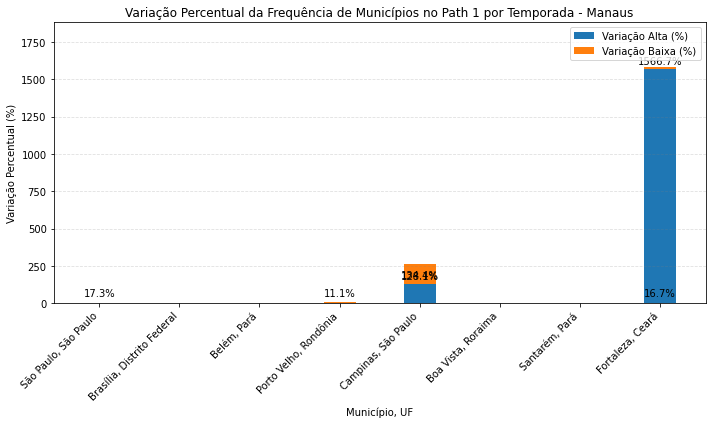

In [21]:
# df_counts continua aqui

# Ajuste da escala do eixo Y e das anotações
fig, ax = plt.subplots(figsize=(10, 6))

# Plota o gráfico com barras separadas para alta e baixa temporada
barras_alta = ax.bar(df_counts.index, df_counts['Variação Alta (%)'], width=0.4, label='Variação Alta (%)')
barras_baixa = ax.bar(df_counts.index, df_counts['Variação Baixa (%)'], width=0.4, label='Variação Baixa (%)', bottom=df_counts['Variação Alta (%)'])

# Adiciona anotações apenas se elas forem significativas
for barra in barras_alta + barras_baixa:
    altura = barra.get_height()
    if altura > 1:  # Ajuste este valor de acordo com o que considerar significativo
        ax.annotate(f'{altura:.1f}%', (barra.get_x() + barra.get_width() / 2, altura),
                    ha='center', va='bottom', xytext=(0, 3), textcoords='offset points')

# Adiciona linhas de grade para melhor visualização
ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)

# Limitar a visualização do eixo Y para melhorar a distribuição visual das barras
ax.set_ylim(0, df_counts['Variação Alta (%)'].max() * 1.2)  # Ajuste para a maior barra ser bem visualizada

plt.title('Variação Percentual da Frequência de Municípios no Path 1 por Temporada - Manaus')
plt.xlabel('Município, UF')
plt.ylabel('Variação Percentual (%)')
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()


In [19]:
df_Final = final_df
# Criar um dicionário para mapear muni_number para "Nome_Município, Nome_UF"
correspondencia_df['Nome_Município_UF'] = correspondencia_df['Nome_Município'] + ', ' + correspondencia_df['Nome_UF']
muni_para_nome_uf = correspondencia_df.set_index('muni_number')['Nome_Município_UF'].to_dict()


# Aplicar o mapeamento para associar os nomes dos municípios
df_Final['muni_1_nome_uf_alta'] = df_Final['muni_1_alta'].map(muni_para_nome_uf)
df_Final['muni_1_nome_uf_baixa'] = df_Final['muni_1_baixa'].map(muni_para_nome_uf)

# Exibir as primeiras linhas do df_Final para verificar o resultado
print(df_Final.head())


    ori_co_ibge  des_co_ibge  muni_1_alta  muni_1_baixa ori_muni_name_alta  \
2       1302603      3101508          949          1596             Manaus   
4       1302603      2103000         5569           169             Manaus   
9       1302603      2909802         5569          3829             Manaus   
16      1302603      3202306          949          3829             Manaus   
17      1302603      2408003          949          3375             Manaus   

   ori_uf_name_alta des_muni_name_alta     des_uf_name_alta  \
2          Amazonas       Além Paraíba         Minas Gerais   
4          Amazonas             Caxias             Maranhão   
9          Amazonas     Cruz das Almas                Bahia   
16         Amazonas             Guaçuí       Espírito Santo   
17         Amazonas            Mossoró  Rio Grande do Norte   

           muni_1_nome_uf_alta  muni_1_nome_uf_baixa  
2             Fortaleza, Ceará    Recife, Pernambuco  
4   Brasília, Distrito Federal           B

/Users/andreza/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/andreza/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [20]:
# Conta a frequência de cada município na coluna 'muni_1' para alta temporada (df1)
muni_counts_alta = final_df['muni_1_alta'].value_counts()

# Conta a frequência de cada município na coluna 'muni_1' para baixa temporada (df2)
muni_counts_baixa = final_df['muni_1_baixa'].value_counts()

# Exibe os resultados
print("Contagem de municípios na alta temporada:\n", muni_counts_alta)
print("\nContagem de municípios na baixa temporada:\n", muni_counts_baixa)

# Para ver os municípios mais frequentes, você pode usar .head(n) onde n é o número de top municípios que você quer ver
print("\nTop 5 municípios na alta temporada:\n", muni_counts_alta.head(5))
print("\nTop 5 municípios na baixa temporada:\n", muni_counts_baixa.head(5))


Contagem de municípios na alta temporada:
 949     99
3829    99
5569    72
3375    70
16      34
1596    20
169     16
264     12
3242    11
Name: muni_1_alta, dtype: int64

Contagem de municípios na baixa temporada:
 3829    173
3375     72
5569     62
1596     45
16       27
169      24
264      13
3242     11
949       6
Name: muni_1_baixa, dtype: int64

Top 5 municípios na alta temporada:
 949     99
3829    99
5569    72
3375    70
16      34
Name: muni_1_alta, dtype: int64

Top 5 municípios na baixa temporada:
 3829    173
3375     72
5569     62
1596     45
16       27
Name: muni_1_baixa, dtype: int64


In [21]:
# Conta a frequência de cada município na coluna 'muni_1_nome_uf_alta' para alta temporada
muni_counts_alta_nome_uf = final_df['muni_1_nome_uf_alta'].value_counts()

# Conta a frequência de cada município na coluna 'muni_1_nome_uf_baixa' para baixa temporada
muni_counts_baixa_nome_uf = final_df['muni_1_nome_uf_baixa'].value_counts()

# Exibe os resultados, incluindo os nomes dos municípios e UFs
print("Contagem de municípios na alta temporada (com nomes e UFs):\n", muni_counts_alta_nome_uf)
print("\nContagem de municípios na baixa temporada (com nomes e UFs):\n", muni_counts_baixa_nome_uf)

# Para ver os municípios mais frequentes, você pode usar .head(n) onde n é o número de top municípios que você quer ver
print("\nTop 5 municípios na alta temporada (com nomes e UFs):\n", muni_counts_alta_nome_uf.head(5))
print("\nTop 5 municípios na baixa temporada (com nomes e UFs):\n", muni_counts_baixa_nome_uf.head(5))


Contagem de municípios na alta temporada (com nomes e UFs):
 Fortaleza, Ceará                  99
São Paulo, São Paulo              99
Brasília, Distrito Federal        72
Campinas, São Paulo               70
Porto Velho, Rondônia             34
Recife, Pernambuco                20
Belém, Pará                       16
Santarém, Pará                    12
Rio de Janeiro, Rio de Janeiro    11
Name: muni_1_nome_uf_alta, dtype: int64

Contagem de municípios na baixa temporada (com nomes e UFs):
 São Paulo, São Paulo              173
Campinas, São Paulo                72
Brasília, Distrito Federal         62
Recife, Pernambuco                 45
Porto Velho, Rondônia              27
Belém, Pará                        24
Santarém, Pará                     13
Rio de Janeiro, Rio de Janeiro     11
Fortaleza, Ceará                    6
Name: muni_1_nome_uf_baixa, dtype: int64

Top 5 municípios na alta temporada (com nomes e UFs):
 Fortaleza, Ceará              99
São Paulo, São Paulo          9

In [22]:
# agrupar tbm com os dados do df original e depois gerar o gráfico para alta, baixa e original

## Análise baseada no tamanho dos caminhos

In [11]:
df1 = manaus7 
df2 = manaus4

# Merge data frames on the common columns
merged_df = pd.merge(df1, df2, on=['ori_co_ibge', 'des_co_ibge'], suffixes=('_df1', '_df2'))

# Compare values for path_len
diff_columns = ['path_len'] #'muni_1', 'muni_2', 'muni_3'

for col in diff_columns:
    merged_df[f'{col}_diff'] = merged_df[f'{col}_df1'] - merged_df[f'{col}_df2']

# Filter rows where there are differences
# differences = merged_df[merged_df[[f'{col}_diff' for col in diff_columns]].ne(0).any(axis=1)]

# Display original values for both data frames and maintain other non-mentioned columns
# original_cols = ['path_len_df1', 'path_len_df2', 'muni_1_df1', 'muni_1_df2', 'muni_2_df1', 'muni_2_df2', 'muni_3_df1', 'muni_3_df2']
# result_cols = ['ori_co_ibge', 'des_co_ibge'] + original_cols + [col for col in merged_df.columns if col not in original_cols]

# print(differences[result_cols])

In [6]:
merged_df.head()

,Unnamed: 0_df1,value_cum_df1,value_df1,ori_muni_name_df1,ori_uf_name_df1,ori_co_ibge,des_muni_name_df1,des_uf_name_df1,des_co_ibge,path_correct_df1,...,ori_uf_name_df2,des_muni_name_df2,des_uf_name_df2,path_correct_df2,path_len_df2,muni_1_df2,muni_2_df2,muni_3_df2,ones_df2,path_len_diff
0,0,123.00,42.00,Manaus,Amazonas,1302603,Areias,São Paulo,3503505,"[111, 3829, 3415, 3307]",...,Amazonas,Areias,São Paulo,"[111, 3829, 3415, 3307]",3,3829,3415.0,3307.0,1,0
1,1,34.00,14.00,Manaus,Amazonas,1302603,Careiro,Amazonas,1301100,"[111, 110, 91]",...,Amazonas,Careiro,Amazonas,"[111, 110, 91]",2,110,91.0,NaN,1,0
2,2,191.00,75.04,Manaus,Amazonas,1302603,Além Paraíba,Minas Gerais,3101508,"[111, 949, 3242, 2258]",...,Amazonas,Além Paraíba,Minas Gerais,"[111, 1596, 3242, 2258]",3,1596,3242.0,2258.0,1,0
3,3,263.00,263.00,Manaus,Amazonas,1302603,Peruíbe,São Paulo,3537602,"[111, 3829, 3690]",...,Amazonas,Peruíbe,São Paulo,"[111, 3829, 3690]",2,3829,3690.0,NaN,1,0
4,4,964.99,71.00,Manaus,Amazonas,1302603,Caxias,Maranhão,2103000,"[111, 5569, 216, 501]",...,Amazonas,Caxias,Maranhão,"[111, 169, 501]",2,169,501.0,NaN,1,1


In [7]:
differences = merged_df[merged_df.path_len_diff != 0]

In [8]:
differences.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 4 to 1627
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0_df1     127 non-null    int64  
 1   value_cum_df1      127 non-null    float64
 2   value_df1          127 non-null    float64
 3   ori_muni_name_df1  127 non-null    object 
 4   ori_uf_name_df1    127 non-null    object 
 5   ori_co_ibge        127 non-null    int64  
 6   des_muni_name_df1  127 non-null    object 
 7   des_uf_name_df1    127 non-null    object 
 8   des_co_ibge        127 non-null    int64  
 9   path_correct_df1   127 non-null    object 
 10  path_len_df1       127 non-null    int64  
 11  muni_1_df1         127 non-null    int64  
 12  muni_2_df1         126 non-null    float64
 13  muni_3_df1         83 non-null     float64
 14  ones_df1           127 non-null    int64  
 15  Unnamed: 0_df2     127 non-null    int64  
 16  value_cum_df2      127 no

Ao analisar todos os resultados da execcução do FF com Manaus como cidade de origem e todos os hubs como destino, foi possível comparar os meses de alta(julho) e baixa temporada (abril).
Inicialmente podemos observar que dos registros (1461 alta e 1452 baixa) presentes nos dados:
- 127 registros dos registros com mesma origem destino apresentam direrenças no tamanho das rotas (quantidade de passos nos caminhos)
- a baixa tempora possui um número menor de rotas (62) que apresentam um terceiro passo, se comparada a alta temporada (83)

In [9]:
differences

,Unnamed: 0_df1,value_cum_df1,value_df1,ori_muni_name_df1,ori_uf_name_df1,ori_co_ibge,des_muni_name_df1,des_uf_name_df1,des_co_ibge,path_correct_df1,...,ori_uf_name_df2,des_muni_name_df2,des_uf_name_df2,path_correct_df2,path_len_df2,muni_1_df2,muni_2_df2,muni_3_df2,ones_df2,path_len_diff
4,4,964.99,71.00,Manaus,Amazonas,1302603,Caxias,Maranhão,2103000,"[111, 5569, 216, 501]",...,Amazonas,Caxias,Maranhão,"[111, 169, 501]",2,169,501.0,NaN,1,1
17,17,117.95,103.95,Manaus,Amazonas,1302603,Mossoró,Rio Grande do Norte,2408003,"[111, 949, 1162]",...,Amazonas,Mossoró,Rio Grande do Norte,"[111, 3375, 949, 1162]",3,3375,949.0,1162.0,1,-1
111,101,129.12,67.12,Manaus,Amazonas,1302603,Nova Olinda do Maranhão,Maranhão,2107357,"[111, 169, 184, 576]",...,Amazonas,Nova Olinda do Maranhão,Maranhão,"[111, 169, 576]",2,169,576.0,NaN,1,1
122,112,888.03,61.42,Manaus,Amazonas,1302603,Gilbués,Piauí,2204402,"[111, 5569, 697, 756]",...,Amazonas,Gilbués,Piauí,"[111, 5569, 756]",2,5569,756.0,NaN,1,1
129,119,652.45,49.00,Manaus,Amazonas,1302603,Barracão,Paraná,4102604,"[111, 3375, 4130, 3942]",...,Amazonas,Barracão,Paraná,"[111, 3829, 3942]",2,3829,3942.0,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1608,1440,183.00,14.00,Manaus,Amazonas,1302603,São Ludgero,Santa Catarina,4217006,"[111, 16, 3980, 4355, 4563]",...,Amazonas,São Ludgero,Santa Catarina,"[111, 16, 4422, 4563]",3,16,4422.0,4563.0,1,1
1609,1440,183.00,14.00,Manaus,Amazonas,1302603,São Ludgero,Santa Catarina,4217006,"[111, 16, 3980, 4355, 4563]",...,Amazonas,São Ludgero,Santa Catarina,"[111, 3375, 4601, 4563]",3,3375,4601.0,4563.0,1,1
1610,1440,183.00,14.00,Manaus,Amazonas,1302603,São Ludgero,Santa Catarina,4217006,"[111, 16, 3980, 4355, 4563]",...,Amazonas,São Ludgero,Santa Catarina,"[111, 3829, 4506, 4563]",3,3829,4506.0,4563.0,1,1
1621,1449,103.95,103.95,Manaus,Amazonas,1302603,Forquilha,Ceará,2304350,"[111, 949, 948]",...,Amazonas,Forquilha,Ceará,"[111, 3375, 949, 948]",3,3375,949.0,948.0,1,-1


In [18]:
differences.to_csv('/Users/andreza/Downloads/FF_differences_Manaus_7vs4.csv')

## análise dos destinos mais e menos frequentados nas duas temporadas

In [21]:

df = differences

# Criar uma nova coluna combinando o nome do município e o estado para a alta e a baixa temporada
df['destino_estado_alta'] = df['des_muni_name_df1'] + ', ' + df['des_uf_name_df1']
df['destino_estado_baixa'] = df['des_muni_name_df2'] + ', ' + df['des_uf_name_df2']

# Contar a frequência de cada destino_estado na alta temporada (df1) e na baixa temporada (df2)
destino_estado_freq_alta = df['destino_estado_alta'].value_counts()
destino_estado_freq_baixa = df['destino_estado_baixa'].value_counts()

# Converter as Series em DataFrames para facilitar a comparação
destino_estado_freq_alta_df = destino_estado_freq_alta.reset_index().rename(columns={'index': 'Destino e Estado', 'destino_estado_alta': 'Frequência Alta Temporada'})
destino_estado_freq_baixa_df = destino_estado_freq_baixa.reset_index().rename(columns={'index': 'Destino e Estado', 'destino_estado_baixa': 'Frequência Baixa Temporada'})

# Mesclar os DataFrames para comparar as frequências lado a lado
comparacao_destino_estado = pd.merge(destino_estado_freq_alta_df, destino_estado_freq_baixa_df, on='Destino e Estado', how='outer').fillna(0)

# Ordenar por frequência na alta temporada para visualizar os destinos mais frequentados nessa temporada
comparacao_destino_estado.sort_values(by='Frequência Alta Temporada', ascending=False, inplace=True)

# Exibir os destinos mais e menos frequentados
print(comparacao_destino_estado.head())  # Mais frequentados
print(comparacao_destino_estado.tail())  # Menos frequentados


                  Destino e Estado  Frequência Alta Temporada  \
0      São Ludgero, Santa Catarina                         10   
1            Lajinha, Minas Gerais                          9   
2  Santana da Vargem, Minas Gerais                          4   
3          Ibirama, Santa Catarina                          3   
4          Osvaldo Cruz, São Paulo                          2   

   Frequência Baixa Temporada  
0                          10  
1                           9  
2                           4  
3                           3  
4                           2  
        Destino e Estado  Frequência Alta Temporada  \
35    Umbuzeiro, Paraíba                          1   
34      Uiraúna, Paraíba                          1   
33  Jaciara, Mato Grosso                          1   
32        Gilbués, Piauí                          1   
99     Amparo, São Paulo                          1   

    Frequência Baixa Temporada  
35                           1  
34                  

In [37]:
comparacao_destino_estado
comparacao_destino_estado.to_csv('/Users/andreza/Downloads/comparacao_destino_estado.csv')

A análise dos destinos mais e menos frequentados nas duas temporadas revela que:

**Destinos mais frequentados** na alta temporada (com as maiores frequências aparecendo na análise): 
- São Ludgero, Santa Catarina
- Lajinha, Minas Gerais
- Santana da Vargem, Minas Gerais
- Ibirama, Santa Catarina
- Edealina, Goiás

Os destinos mais frequentados, indicam que essas rotas são populares independentemente da temporada, visto que suas frequências não diminuem na baixa temporada. Os dados mostram uma constância em sua popularidade, com frequências idênticas nas duas temporadas, indicando que são escolhas estáveis para viagens a partir de Manaus, independentemente da época do ano.

**Destinos menos frequentados** (com as menores frequências e aparecendo no final da lista): 
- Barbalha, Ceará
- Umbuzeiro, Paraíba
- João Pessoa, Paraíba
- Porto Velho, Rondônia
- Alto Araguaia, Mato Grosso

Cada uma com apenas uma rota registrada em ambos os conjuntos de dados, indicando que esses destinos são igualmente menos procurados em ambas as temporadas.

## Mudanças nos Municípios Intermediários 
### Analisar como as rotas mudam, especificamente se certos municípios intermediários se tornam mais comuns em uma temporada.

In [35]:
df = differences
correspondencia_df = correspondencia_muni

# Criar um dicionário para mapear muni_number para "Nome_Município, Nome_UF"
correspondencia_df['Nome_Município_UF'] = correspondencia_df['Nome_Município'] + ', ' + correspondencia_df['Nome_UF']
muni_para_nome_uf = correspondencia_df.set_index('muni_number')['Nome_Município_UF'].to_dict()

# Extrair todos os municípios intermediários das colunas relevantes para ambas as temporadas
municipios_intermediarios_alta = pd.concat([df['muni_1_df1'], df['muni_2_df1'], df['muni_3_df1']]).dropna()
municipios_intermediarios_baixa = pd.concat([df['muni_1_df2'], df['muni_2_df2'], df['muni_3_df2']]).dropna()

# Contabilizar a frequência de cada município intermediário nas duas temporadas
frequencia_municipios_alta = municipios_intermediarios_alta.value_counts()
frequencia_municipios_baixa = municipios_intermediarios_baixa.value_counts()

# Converter as Series em DataFrames para facilitar a comparação
frequencia_municipios_alta_df = frequencia_municipios_alta.reset_index().rename(columns={'index': 'Município Intermediário', 0: 'Frequência Alta Temporada'})
frequencia_municipios_baixa_df = frequencia_municipios_baixa.reset_index().rename(columns={'index': 'Município Intermediário', 0: 'Frequência Baixa Temporada'})

# Mesclar os DataFrames para comparar as frequências lado a lado
comparacao_municipios_intermediarios = pd.merge(frequencia_municipios_alta_df, frequencia_municipios_baixa_df, on='Município Intermediário', how='outer').fillna(0)

# Atualizar os DataFrames para incluir os nomes e estados dos municípios intermediários
comparacao_municipios_intermediarios['Nome Município, UF'] = comparacao_municipios_intermediarios['Município Intermediário'].map(muni_para_nome_uf)

# Calcular a diferença de frequência entre as temporadas
comparacao_municipios_intermediarios['Diferença de Frequência'] = comparacao_municipios_intermediarios['Frequência Alta Temporada'] - comparacao_municipios_intermediarios['Frequência Baixa Temporada']

# Reorganizar as colunas para visualização
comparacao_municipios_intermediarios = comparacao_municipios_intermediarios[['Município Intermediário', 'Nome Município, UF', 'Frequência Alta Temporada', 'Frequência Baixa Temporada', 'Diferença de Frequência']]

# Ordenar para identificar mudanças significativas
comparacao_municipios_intermediarios.sort_values(by='Diferença de Frequência', ascending=False, inplace=True)

# Exibir os resultados
print(comparacao_municipios_intermediarios.head())
print(comparacao_municipios_intermediarios.tail())


    Município Intermediário       Nome Município, UF  \
1                     949.0         Fortaleza, Ceará   
4                    3980.0         Cascavel, Paraná   
14                   1590.0    Petrolina, Pernambuco   
17                   3174.0  Vitória, Espírito Santo   
25                   4130.0       Medianeira, Paraná   

    Frequência Alta Temporada  Frequência Baixa Temporada  \
1                        29.0                        17.0   
4                        11.0                         5.0   
14                        3.0                         0.0   
17                        2.0                         0.0   
25                        2.0                         0.0   

    Diferença de Frequência  
1                      12.0  
4                       6.0  
14                      3.0  
17                      2.0  
25                      2.0  
    Município Intermediário    Nome Município, UF  Frequência Alta Temporada  \
74                    184.0        C

In [38]:
comparacao_municipios_intermediarios.to_csv('/Users/andreza/Downloads/comparacao_municipios_intermediarios.csv')

In [45]:
comparacao_municipios_intermediarios


,Município Intermediário,"Nome Município, UF",Frequência Alta Temporada,Frequência Baixa Temporada,Diferença de Frequência
1,949.0,"Fortaleza, Ceará",29.0,17.0,12.0
4,3980.0,"Cascavel, Paraná",11.0,5.0,6.0
14,1590.0,"Petrolina, Pernambuco",3.0,0.0,3.0
17,3174.0,"Vitória, Espírito Santo",2.0,0.0,2.0
25,4130.0,"Medianeira, Paraná",2.0,0.0,2.0
...,...,...,...,...,...
74,184.0,"Capanema, Pará",1.0,4.0,-3.0
15,1596.0,"Recife, Pernambuco",3.0,7.0,-4.0
0,3829.0,"São Paulo, São Paulo",41.0,46.0,-5.0
5,3375.0,"Campinas, São Paulo",9.0,18.0,-9.0


**Municípios mais comuns na alta temporada** (indicados pelo aumento na frequência):
- Fortaleza, com um aumento de 12 na frequência da alta para a baixa temporada.
- Cascavel, com um aumento de 6 na frequência.
- Petrolina, com um aumento de 3 na frequência.
- Teresina, também com um aumento de 2 na frequência.

Essas mudanças podem indicar rotas preferenciais ou alternativas que se tornam mais atrativas ou viáveis durante a alta temporada por diversos motivos, como eventos locais, custo, condições climáticas favoráveis, ou até mesmo estratégias de otimização de rotas por parte das companhias aéreas.

**Municípios menos comuns na alta temporada** (indicados pela diminuição na frequência):
- Belém, com uma diminuição de 11 na frequência.
- Campinas, com uma diminuição de 9 na frequência.
- São Paulo, com uma diminuição de 5 na frequência.
- Recife, com uma diminuição de 4 na frequência.

*é importante destacar que embora a frequência de certos municípios intermediários diminua na alta temporada, eles experimentam um **aumento significativo na baixa temporada**, como Belém (4 alta e 15 na baixa) e Campinas (9 na alta e 18 na baixa) por exemplo. Isso pode refletir um padrão interessante de deslocamento, onde esses municípios se tornam pontos de passagem preferenciais ou necessários em determinadas épocas do ano, possivelmente devido a fatores sazonais, eventos locais, ou variações nas condições de viagem e logística.

## analisar as principais rotas que possuem esses municípios como passagem

In [50]:
df = differences
correspondencia_df = correspondencia_muni

# Criar um dicionário para mapear muni_number para Nome_Município
muni_para_nome = correspondencia_df.set_index('muni_number')['Nome_Município'].to_dict()

# Atualizar o DataFrame para incluir os nomes dos municípios intermediários e de origem
df['muni_1_df1_nome'] = df['muni_1_df1'].map(muni_para_nome).fillna('Desconhecido')
df['muni_2_df1_nome'] = df['muni_2_df1'].map(muni_para_nome).fillna('Desconhecido')
df['muni_3_df1_nome'] = df['muni_3_df1'].map(muni_para_nome).fillna('Desconhecido')
df['muni_1_df2_nome'] = df['muni_1_df2'].map(muni_para_nome).fillna('Desconhecido')
df['muni_2_df2_nome'] = df['muni_2_df2'].map(muni_para_nome).fillna('Desconhecido')
df['muni_3_df2_nome'] = df['muni_3_df2'].map(muni_para_nome).fillna('Desconhecido')

# Municípios de interesse para alta temporada e baixa temporada
municipios_alta = ['Fortaleza', 'Cascavel', 'Petrolina', 'Teresina']
municipios_baixa = ['Belém', 'Campinas', 'São Paulo', 'Recife']

# Mapeamento reverso dos nomes para os números dos municípios para facilitar a filtragem
nome_para_muni = {v: k for k, v in muni_para_nome.items()}

# Converter nomes para números de municípios usando o mapeamento
municipios_alta_nums = [nome_para_muni.get(nome) for nome in municipios_alta]
municipios_baixa_nums = [nome_para_muni.get(nome) for nome in municipios_baixa]

# Filtrar as rotas que incluem esses municípios intermediários
# Alta temporada, ordenadas pelo 'value_df1'
rotas_alta_relevantes = df[df[['muni_1_df1', 'muni_2_df1', 'muni_3_df1']].apply(lambda x: x.isin(municipios_alta_nums).any(), axis=1)].sort_values(by='value_df1', ascending=False)

# Baixa temporada, ordenadas pelo 'value_df2'
rotas_baixa_relevantes = df[df[['muni_1_df2', 'muni_2_df2', 'muni_3_df2']].apply(lambda x: x.isin(municipios_baixa_nums).any(), axis=1)].sort_values(by='value_df2', ascending=False)

# Exibir resultados para alta temporada
print("Rotas Mais Relevantes na Alta Temporada (por Valor):")
print(rotas_alta_relevantes[['ori_muni_name_df1', 'des_muni_name_df1', 'muni_1_df1_nome', 'muni_2_df1_nome', 'muni_3_df1_nome', 'value_df1']].head())

# Exibir resultados para baixa temporada
print("\nRotas Mais Relevantes na Baixa Temporada (por Valor):")
print(rotas_baixa_relevantes[['ori_muni_name_df2', 'des_muni_name_df2', 'muni_1_df2_nome', 'muni_2_df2_nome', 'muni_3_df2_nome', 'value_df2']].head())


Rotas Mais Relevantes na Alta Temporada (por Valor):
     ori_muni_name_df1 des_muni_name_df1 muni_1_df1_nome muni_2_df1_nome  \
17              Manaus           Mossoró       Fortaleza         Mossoró   
616             Manaus             Crato       Fortaleza           Crato   
1282            Manaus               Açu       Fortaleza             Açu   
1270            Manaus            Iguatu       Fortaleza          Iguatu   
1025            Manaus        Boa Viagem       Fortaleza      Boa Viagem   

     muni_3_df1_nome  value_df1  
17      Desconhecido     103.95  
616     Desconhecido     103.95  
1282    Desconhecido     103.95  
1270    Desconhecido     103.95  
1025    Desconhecido     103.95  

Rotas Mais Relevantes na Baixa Temporada (por Valor):
     ori_muni_name_df2 des_muni_name_df2 muni_1_df2_nome muni_2_df2_nome  \
1254            Manaus         Rio Acima       São Paulo  Belo Horizonte   
747             Manaus          Ourinhos       São Paulo        Ourinhos   
317

In [53]:

# Função para filtrar e selecionar a rota mais relevante para cada município
def selecionar_rotas_relevantes(df, municipios_nums, nome_temporada, nome_valor):
    rotas_selecionadas = []
    for muni_num in municipios_nums:
        # Filtrar rotas que incluem o município atual como intermediário
        rotas_municipio = df[df[[f'muni_1_{nome_temporada}', f'muni_2_{nome_temporada}', f'muni_3_{nome_temporada}']].apply(lambda x: muni_num in x.values, axis=1)]
        # Selecionar a rota com maior valor para o município atual
        rota_mais_relevante = rotas_municipio.nlargest(1, nome_valor)
        rotas_selecionadas.append(rota_mais_relevante)
    # Concatenar todas as rotas selecionadas em um único DataFrame
    return pd.concat(rotas_selecionadas)

# Selecionar rotas relevantes para cada município na alta temporada
rotas_alta_relevantes = selecionar_rotas_relevantes(df, municipios_alta_nums, 'df1', 'value_df1')

# Selecionar rotas relevantes para cada município na baixa temporada
rotas_baixa_relevantes = selecionar_rotas_relevantes(df, municipios_baixa_nums, 'df2', 'value_df2')

# Exibir as rotas selecionadas
print("Rotas Mais Relevantes na Alta Temporada (por Valor):")
print(rotas_alta_relevantes[['ori_muni_name_df1', 'des_muni_name_df1', 'muni_1_df1_nome', 'muni_2_df1_nome', 'muni_3_df1_nome', 'value_df1']])

print("\nRotas Mais Relevantes na Baixa Temporada (por Valor):")
print(rotas_baixa_relevantes[['ori_muni_name_df2', 'des_muni_name_df2', 'muni_1_df2_nome', 'muni_2_df2_nome', 'muni_3_df2_nome', 'value_df2']])


Rotas Mais Relevantes na Alta Temporada (por Valor):
    ori_muni_name_df1 des_muni_name_df1 muni_1_df1_nome muni_2_df1_nome  \
17             Manaus           Mossoró       Fortaleza         Mossoró   
708            Manaus     Serra Talhada        Brasília       Petrolina   
351            Manaus          Floriano       São Paulo        Teresina   

    muni_3_df1_nome  value_df1  
17     Desconhecido     103.95  
708   Serra Talhada      65.00  
351        Floriano      79.00  

Rotas Mais Relevantes na Baixa Temporada (por Valor):
     ori_muni_name_df2 des_muni_name_df2 muni_1_df2_nome muni_2_df2_nome  \
261             Manaus       Pederneiras        Campinas     Pederneiras   
1254            Manaus         Rio Acima       São Paulo  Belo Horizonte   
1340            Manaus          Sertânia        Campinas          Recife   

     muni_3_df2_nome  value_df2  
261     Desconhecido     104.83  
1254       Rio Acima     153.88  
1340        Sertânia      78.83  



**Rotas Principais na Alta Temporada**
As principais rotas que incluem Fortaleza, Cascavel, Petrolina, e Teresina como municípios intermediários são destacadas em destinos como: 
- Manaus-Fortaleza-Mossoró, 
- Manaus-Brasília-Petrolina-Serra Talhada, e
- Manaus-São Paulo-Teresina-Floriano. 

Estas rotas utilizam um ou mais dos municípios de interesse como pontos de passagem, indicando sua importância na conectividade e preferência nas viagens desta temporada.

**Rotas Principais na Baixa Temporada**
Na baixa temporada, as rotas que apresentam Belém, Campinas, São Paulo, e Recife como municípios intermediários incluem destinos como:
- Manaus-Campinas-Pederneiras, 
- Manaus-São Paulo-Belo Horizonte-Rio Acima, e
- Manaus-Campinas-Recife-Sertânia

Essas rotas refletem a mudança nas preferências ou necessidades de deslocamento, com esses municípios intermediários servindo como pontos críticos na baixa temporada.

## Analisar as diferencas nas distancias das rotas
### cumprimentos dos caminhos

In [55]:
# Calcular estatísticas básicas para a diferença no comprimento das rotas
estatisticas_distancia = df['path_len_diff'].describe()
print(estatisticas_distancia)


count    127.000000
mean       0.188976
std        0.997873
min       -1.000000
25%       -1.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: path_len_diff, dtype: float64


In [57]:
# Identificar rotas com a mesma origem e destino em ambas as temporadas
rotas_mesma_origem_destino = df[df.apply(lambda x: (x['ori_muni_name_df1'] == x['ori_muni_name_df2']) and (x['des_muni_name_df1'] == x['des_muni_name_df2']), axis=1)]

# Calcular a diferença no comprimento das rotas entre as temporadas
rotas_mesma_origem_destino['path_len_diff_abs'] = rotas_mesma_origem_destino['path_len_diff'].abs()

# Ordenar as rotas pela maior diferença absoluta na extensão das rotas
rotas_diferencas_significativas = rotas_mesma_origem_destino.sort_values(by='path_len_diff_abs', ascending=False)

# Exibir as rotas com as maiores diferenças
rotas_diferencas_significativas[['ori_muni_name_df1', 'des_muni_name_df1', 'path_len_df1', 'path_len_df2', 'path_len_diff']].head()



,ori_muni_name_df1,des_muni_name_df1,path_len_df1,path_len_df2,path_len_diff
1254,Manaus,Rio Acima,5,3,2
1097,Manaus,Canaã dos Carajás,3,2,1
1200,Manaus,São Gabriel do Oeste,3,2,1
1199,Manaus,Eunápolis,3,2,1
1190,Manaus,Parambu,3,2,1


In [64]:
##exibir tbm os municipios intermediarios

df = differences
correspondencia_df = correspondencia_muni

# Mapear muni_number para Nome_Município
muni_para_nome = correspondencia_df.set_index('muni_number')['Nome_Município'].to_dict()

# Atualizar df para incluir os nomes dos municípios intermediários
df['muni_1_df1_nome'] = df['muni_1_df1'].map(muni_para_nome).fillna('Desconhecido')
df['muni_2_df1_nome'] = df['muni_2_df1'].map(muni_para_nome).fillna('Desconhecido')
df['muni_3_df1_nome'] = df['muni_3_df1'].map(muni_para_nome).fillna('Desconhecido')
df['muni_1_df2_nome'] = df['muni_1_df2'].map(muni_para_nome).fillna('Desconhecido')
df['muni_2_df2_nome'] = df['muni_2_df2'].map(muni_para_nome).fillna('Desconhecido')
df['muni_3_df2_nome'] = df['muni_3_df2'].map(muni_para_nome).fillna('Desconhecido')

# Calcular a diferença absoluta no comprimento das rotas
df['path_len_diff_abs'] = (df['path_len_df1'] - df['path_len_df2']).abs()

# Filtrar rotas com a mesma origem e destino em ambas as temporadas e considerar relevância pelo valor
rotas_filtradas_alta = df[(df['ori_muni_name_df1'] == df['ori_muni_name_df2']) & (df['des_muni_name_df1'] == df['des_muni_name_df2'])].sort_values(by=['value_df1', 'path_len_diff_abs'], ascending=[False, False])

rotas_filtradas_baixa = df[(df['ori_muni_name_df1'] == df['ori_muni_name_df2']) & (df['des_muni_name_df1'] == df['des_muni_name_df2'])].sort_values(by=['value_df2', 'path_len_diff_abs'], ascending=[False, False])

# Selecionar colunas de interesse incluindo os municípios intermediários e valores
colunas_interesse_alta = ['ori_muni_name_df1', 'des_muni_name_df1', 'muni_1_df1_nome', 'muni_2_df1_nome', 'muni_3_df1_nome', 'path_len_df1', 'value_df1', 'path_len_diff_abs']
colunas_interesse_baixa = ['ori_muni_name_df2', 'des_muni_name_df2', 'muni_1_df2_nome', 'muni_2_df2_nome', 'muni_3_df2_nome', 'path_len_df2', 'value_df2', 'path_len_diff_abs']

# Exibir as rotas mais relevantes por valor e diferença na extensão para a alta temporada
print("Rotas Mais Relevantes na Alta Temporada (por Valor e Diferença na Extensão):")
print(rotas_filtradas_alta[colunas_interesse_alta].head())

# Exibir as rotas mais relevantes por valor e diferença na extensão para a baixa temporada
print("\nRotas Mais Relevantes na Baixa Temporada (por Valor e Diferença na Extensão):")
print(rotas_filtradas_baixa[colunas_interesse_baixa].head())


Rotas Mais Relevantes na Alta Temporada (por Valor e Diferença na Extensão):
     ori_muni_name_df1 des_muni_name_df1 muni_1_df1_nome   muni_2_df1_nome  \
1254            Manaus         Rio Acima       São Paulo    Belo Horizonte   
261             Manaus       Pederneiras       São Paulo             Bauru   
1296            Manaus            Amparo       São Paulo  Águas de Lindóia   
1500            Manaus       Porto Velho     Porto Velho      Desconhecido   
238             Manaus           Itapema        Brasília     Florianópolis   

     muni_3_df1_nome  path_len_df1  value_df1  path_len_diff_abs  
1254         Raposos             5     228.09                  2  
261      Pederneiras             3     146.95                  1  
1296          Amparo             3     144.00                  1  
1500    Desconhecido             1     135.98                  1  
238          Itapema             3     134.47                  1  

Rotas Mais Relevantes na Baixa Temporada (por Valor

Os resultados apontam as rotas mais relevantes considerando: 
- variação significativa no tamanho do caminho (direrença=2), a maioria possui diferença=1;  
- e maior valor de capacidade 

**Principais rotas Alta**

**Manaus -> Rio Acima**	(path alta: 5; path baixa: 3; direrença: 2)
- Intermediários alta: São Paulo, Belo Horizonte, Raposos

**Manaus -> Pederneiras** (path alta: 3; path baixa: 2; direrença: 1)
- Intermediários alta: São Paulo, Bauru 

**Manaus -> Amparo** (path alta: 3; path baixa: 2; direrença: 1)
- Intermediários alta: São Paulo, Águas de Lindóia

**Manaus -> Porto Velho** (path alta: 3; path baixa: 2; direrença: 1)
- Intermediários alta: --

**Manaus -> Itapema**	(path alta: 3; path baixa: 2; direrença: 1)
- Intermediários alta: Brasília, Florianópolis 

**Principais rotas Baixa**

**Manaus -> Rio Acima**	(path alta: 5; path baixa: 3; direrença: 2)
- Intermediários baixa: São Paulo, Belo Horizonte

**Manaus -> Ourinhos**	(path alta: 5; path baixa: 3; direrença: 2)
- Intermediários baixa: São Paulo

**Manaus -> Careaçu **	(path alta: 5; path baixa: 3; direrença: 2)
- Intermediários baixa: São Paulo

**Manaus -> Amparo **	(path alta: 5; path baixa: 3; direrença: 2)
- Intermediários baixa: São Paulo

**Manaus -> Pederneiras** (path alta: 3; path baixa: 2; direrença: 1)
- Intermediários baixa: Campinas

In [65]:
##exibir tbm os municipios intermediarios

df = differences
correspondencia_df = correspondencia_muni

# Criar um dicionário para mapear muni_number para Nome_Município
muni_para_nome = correspondencia_df.set_index('muni_number')['Nome_Município'].to_dict()

# Adicionar colunas com os nomes dos municípios intermediários
df['muni_1_df1_nome'] = df['muni_1_df1'].map(muni_para_nome).fillna('Desconhecido')
df['muni_2_df1_nome'] = df['muni_2_df1'].map(muni_para_nome).fillna('Desconhecido')
df['muni_3_df1_nome'] = df['muni_3_df1'].map(muni_para_nome).fillna('Desconhecido')
df['muni_1_df2_nome'] = df['muni_1_df2'].map(muni_para_nome).fillna('Desconhecido')
df['muni_2_df2_nome'] = df['muni_2_df2'].map(muni_para_nome).fillna('Desconhecido')
df['muni_3_df2_nome'] = df['muni_3_df2'].map(muni_para_nome).fillna('Desconhecido')

# Calcular a diferença absoluta no comprimento das rotas
df['path_len_diff_abs'] = (df['path_len_df1'] - df['path_len_df2']).abs()

# Filtrar rotas com a mesma origem e destino em ambas as temporadas
rotas_filtradas = df[(df['ori_muni_name_df1'] == df['ori_muni_name_df2']) & (df['des_muni_name_df1'] == df['des_muni_name_df2'])]

# Ordenar as rotas pela maior diferença absoluta na extensão das rotas
rotas_ordenadas = rotas_filtradas.sort_values(by='path_len_diff_abs', ascending=False)

# Selecionar as colunas de interesse incluindo os municípios intermediários
colunas_interesse = ['ori_muni_name_df1', 'des_muni_name_df1', 'muni_1_df1_nome', 'muni_2_df1_nome', 'muni_3_df1_nome', 'path_len_df1', 'muni_1_df2_nome', 'muni_2_df2_nome', 'muni_3_df2_nome', 'path_len_df2', 'path_len_diff_abs']

# Exibir as top rotas com maiores diferenças
rotas_ordenadas[colunas_interesse].head()

,ori_muni_name_df1,des_muni_name_df1,muni_1_df1_nome,muni_2_df1_nome,muni_3_df1_nome,path_len_df1,muni_1_df2_nome,muni_2_df2_nome,muni_3_df2_nome,path_len_df2,path_len_diff_abs
1254,Manaus,Rio Acima,São Paulo,Belo Horizonte,Raposos,5,São Paulo,Belo Horizonte,Rio Acima,3,2
1097,Manaus,Canaã dos Carajás,Brasília,Marabá,Canaã dos Carajás,3,Belém,Canaã dos Carajás,Desconhecido,2,1
1200,Manaus,São Gabriel do Oeste,São Paulo,Cascavel,São Gabriel do Oeste,3,Porto Velho,São Gabriel do Oeste,Desconhecido,2,1
1199,Manaus,Eunápolis,Brasília,Porto Seguro,Eunápolis,3,São Paulo,Eunápolis,Desconhecido,2,1
1190,Manaus,Parambu,Fortaleza,Boa Viagem,Parambu,3,Fortaleza,Parambu,Desconhecido,2,1


Os resultados apontam uma rota com variação significativa no tamanho do caminho (direrença=2), a maioria possui diferença=1. Ou seja, apresenta um município a mais como passagem na alta ou baixa temporada.

**Manaus -> Rio Acima**	(path alta: 5; path baixa: 3; direrença: 2)
- Intermediários alta: São Paulo, Belo Horizonte, Raposos
- Intermediários baixa: São Paulo, Belo Horizonte

**Manaus -> Canaã dos Carajás** (path alta: 3; path baixa: 2; direrença: 1)
- Intermediários alta: Brasília, Marabá
- Intermediários baixa: Belém

**Manaus -> São Gabriel do Oeste** (path alta: 3; path baixa: 2; direrença: 1)
- Intermediários alta: São Paulo, Cascavel
- Intermediários baixa: Porto Velho

**Manaus -> Eunápolis** (path alta: 3; path baixa: 2; direrença: 1)
- Intermediários alta: Brasília, Porto Seguro
- Intermediários baixa: São Paulo

**Manaus -> Parambu**	(path alta: 3; path baixa: 2; direrença: 1)
- Intermediários alta: Fortaleza, Boa Viagem	
- Intermediários baixa: Fortaleza


### incluindo municipios de interesse
municipios_alta = ['Fortaleza', 'Cascavel', 'Petrolina', 'Teresina']

municipios_baixa = ['Belém', 'Campinas', 'São Paulo', 'Recife']

levando em consideração os municípios de interesse específicos para cada temporada. Ele destaca as rotas que não apenas passam por esses municípios intermediários de interesse, mas também são relevantes com base no valor e nas diferenças na extensão das rotas

In [67]:
df = differences
correspondencia_df = correspondencia_muni

# Mapear muni_number para Nome_Município
muni_para_nome = correspondencia_df.set_index('muni_number')['Nome_Município'].to_dict()

# Lista de municípios de interesse para alta e baixa temporada
municipios_alta = ['Fortaleza', 'Cascavel', 'Petrolina', 'Teresina']
municipios_baixa = ['Belém', 'Campinas', 'São Paulo', 'Recife']

# Mapeamento reverso dos nomes para os números dos municípios para facilitar a filtragem
nome_para_muni = {v: k for k, v in muni_para_nome.items()}
municipios_alta_nums = [nome_para_muni.get(nome) for nome in municipios_alta]
municipios_baixa_nums = [nome_para_muni.get(nome) for nome in municipios_baixa]

# Atualizar df para incluir os nomes dos municípios intermediários
for col in ['muni_1_df1', 'muni_2_df1', 'muni_3_df1', 'muni_1_df2', 'muni_2_df2', 'muni_3_df2']:
    df[f'{col}_nome'] = df[col].map(muni_para_nome).fillna('Desconhecido')

# Calcular a diferença absoluta no comprimento das rotas
df['path_len_diff_abs'] = (df['path_len_df1'] - df['path_len_df2']).abs()

# Filtrar rotas que incluem os municípios de interesse como intermediários
rotas_alta_interesse = df[df[['muni_1_df1', 'muni_2_df1', 'muni_3_df1']].isin(municipios_alta_nums).any(axis=1)]
rotas_baixa_interesse = df[df[['muni_1_df2', 'muni_2_df2', 'muni_3_df2']].isin(municipios_baixa_nums).any(axis=1)]

# Ordenar as rotas filtradas por valor e diferença na extensão das rotas
rotas_alta_ordenadas = rotas_alta_interesse.sort_values(by=['value_df1', 'path_len_diff_abs'], ascending=[False, False])
rotas_baixa_ordenadas = rotas_baixa_interesse.sort_values(by=['value_df2', 'path_len_diff_abs'], ascending=[False, False])

# Selecionar colunas de interesse
colunas_interesse = ['ori_muni_name_df1', 'des_muni_name_df1', 'muni_1_df1_nome', 'muni_2_df1_nome', 'muni_3_df1_nome', 'path_len_df1', 'value_df1', 'path_len_diff_abs']

# Exibir as rotas mais relevantes
print("Rotas Mais Relevantes na Alta Temporada com Municípios Intermediários de Interesse:")
print(rotas_alta_ordenadas[colunas_interesse].head())

print("\nRotas Mais Relevantes na Baixa Temporada com Municípios Intermediários de Interesse:")
print(rotas_baixa_ordenadas[colunas_interesse].head())


Rotas Mais Relevantes na Alta Temporada com Municípios Intermediários de Interesse:
    ori_muni_name_df1 des_muni_name_df1 muni_1_df1_nome muni_2_df1_nome  \
17             Manaus           Mossoró       Fortaleza         Mossoró   
384            Manaus          Madalena       Fortaleza        Madalena   
412            Manaus              Cruz       Fortaleza            Cruz   
504            Manaus           Guaiúba       Fortaleza         Guaiúba   
616            Manaus             Crato       Fortaleza           Crato   

    muni_3_df1_nome  path_len_df1  value_df1  path_len_diff_abs  
17     Desconhecido             2     103.95                  1  
384    Desconhecido             2     103.95                  1  
412    Desconhecido             2     103.95                  1  
504    Desconhecido             2     103.95                  1  
616    Desconhecido             2     103.95                  1  

Rotas Mais Relevantes na Baixa Temporada com Municípios Intermediári

In [56]:
# Calcular estatísticas básicas para as variações nos valores associados a cada rota
estatisticas_valor_alta = df[['value_df1', 'value_cum_df1']].describe()
estatisticas_valor_baixa = df[['value_df2', 'value_cum_df2']].describe()

print("Estatísticas de Valor - Alta Temporada:\n", estatisticas_valor_alta)
print("\nEstatísticas de Valor - Baixa Temporada:\n", estatisticas_valor_baixa)


Estatísticas de Valor - Alta Temporada:
         value_df1  value_cum_df1
count  127.000000     127.000000
mean    64.975748     358.261496
std     38.095001     354.506690
min     12.000000      14.000000
25%     37.610000      94.895000
50%     62.590000     173.000000
75%     94.685000     584.595000
max    228.090000    1149.780000

Estatísticas de Valor - Baixa Temporada:
         value_df2  value_cum_df2
count  127.000000     127.000000
mean    52.229685     176.357165
std     27.910456     170.909158
min     12.000000      14.000000
25%     32.000000      56.000000
50%     49.000000     112.640000
75%     69.975000     218.135000
max    153.880000     862.200000


In [72]:
rotas_ordenadas.to_csv('/Users/andreza/Downloads/rotas_ordenadas.csv')

In [73]:
rotas_ordenadas

,Unnamed: 0_df1,value_cum_df1,value_df1,ori_muni_name_df1,ori_uf_name_df1,ori_co_ibge,des_muni_name_df1,des_uf_name_df1,des_co_ibge,path_correct_df1,...,path_len_diff,destino_estado_alta,destino_estado_baixa,muni_1_df1_nome,muni_2_df1_nome,muni_3_df1_nome,muni_1_df2_nome,muni_2_df2_nome,muni_3_df2_nome,path_len_diff_abs
1254,1143,698.09,228.09,Manaus,Amazonas,1302603,Rio Acima,Minas Gerais,3154804,"[111, 3829, 2309, 2871, 2763, 2882]",...,2,"Rio Acima, Minas Gerais","Rio Acima, Minas Gerais",São Paulo,Belo Horizonte,Raposos,São Paulo,Belo Horizonte,Rio Acima,2
1097,1021,606.60,71.00,Manaus,Amazonas,1302603,Canaã dos Carajás,Pará,1502152,"[111, 5569, 216, 183]",...,1,"Canaã dos Carajás, Pará","Canaã dos Carajás, Pará",Brasília,Marabá,Canaã dos Carajás,Belém,Canaã dos Carajás,Desconhecido,1
1200,1089,841.51,89.00,Manaus,Amazonas,1302603,São Gabriel do Oeste,Mato Grosso do Sul,5007695,"[111, 3829, 3980, 5172]",...,1,"São Gabriel do Oeste, Mato Grosso do Sul","São Gabriel do Oeste, Mato Grosso do Sul",São Paulo,Cascavel,São Gabriel do Oeste,Porto Velho,São Gabriel do Oeste,Desconhecido,1
1199,1088,941.63,86.42,Manaus,Amazonas,1302603,Eunápolis,Bahia,2910727,"[111, 5569, 2137, 1954]",...,1,"Eunápolis, Bahia","Eunápolis, Bahia",Brasília,Porto Seguro,Eunápolis,São Paulo,Eunápolis,Desconhecido,1
1190,1080,173.00,31.00,Manaus,Amazonas,1302603,Parambu,Ceará,2310308,"[111, 949, 920, 1025]",...,1,"Parambu, Ceará","Parambu, Ceará",Fortaleza,Boa Viagem,Parambu,Fortaleza,Parambu,Desconhecido,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,610,91.00,91.00,Manaus,Amazonas,1302603,Várzea Alegre,Ceará,2314003,"[111, 949, 1073]",...,-1,"Várzea Alegre, Ceará","Várzea Alegre, Ceará",Fortaleza,Várzea Alegre,Desconhecido,São Paulo,Juazeiro do Norte,Várzea Alegre,1
650,604,56.00,56.00,Manaus,Amazonas,1302603,Codó,Maranhão,2103307,"[111, 169, 508]",...,-1,"Codó, Maranhão","Codó, Maranhão",Belém,Codó,Desconhecido,São Paulo,São Luís,Codó,1
644,598,1114.00,91.00,Manaus,Amazonas,1302603,Nova Mutum,Mato Grosso,5106224,"[111, 5569, 5219, 5259]",...,1,"Nova Mutum, Mato Grosso","Nova Mutum, Mato Grosso",Brasília,Cuiabá,Nova Mutum,Santarém,Nova Mutum,Desconhecido,1
633,587,159.88,91.09,Manaus,Amazonas,1302603,Caldas Novas,Goiás,5204508,"[111, 3829, 5370]",...,-1,"Caldas Novas, Goiás","Caldas Novas, Goiás",São Paulo,Caldas Novas,Desconhecido,Brasília,Goiânia,Caldas Novas,1


In [109]:
from plotly.graph_objs import Sankey
import matplotlib.pyplot as plt


dados = rotas_ordenadas


# Preparando os dados para o gráfico Sankey
labels_alta = pd.concat([
    dados['ori_muni_name_df1'], dados['des_muni_name_df1'],
    dados['muni_1_df1_nome'], dados['muni_2_df1_nome'], dados['muni_3_df1_nome']
]).unique()

# Criando um mapeamento de nomes para índices
label_to_index_alta = {label: idx for idx, label in enumerate(labels_alta)}

# Preparando as fontes, destinos e valores para os fluxos
sources_alta = dados.apply(lambda row: label_to_index_alta[row['ori_muni_name_df1']], axis=1)
targets_alta = dados.apply(lambda row: label_to_index_alta[row['des_muni_name_df1']], axis=1)
values_alta = dados['value_df1']

# Nodes intermediários
sources_intermediarios_alta = pd.concat([
    dados.apply(lambda row: label_to_index_alta[row['ori_muni_name_df1']], axis=1),
    dados.apply(lambda row: label_to_index_alta[row['muni_1_df1_nome']], axis=1),
    dados.apply(lambda row: label_to_index_alta[row['muni_2_df1_nome']], axis=1)
])

targets_intermediarios_alta = pd.concat([
    dados.apply(lambda row: label_to_index_alta[row['muni_1_df1_nome']], axis=1),
    dados.apply(lambda row: label_to_index_alta[row['muni_2_df1_nome']], axis=1),
    dados.apply(lambda row: label_to_index_alta[row['muni_3_df1_nome']], axis=1)
])

values_intermediarios_alta = pd.concat([
    dados['value_df1'], dados['value_df1'], dados['value_df1']
])

# Juntando fontes, destinos e valores dos fluxos principais com os intermediários
sources_alta_final = pd.concat([sources_alta, sources_intermediarios_alta])
targets_alta_final = pd.concat([targets_alta, targets_intermediarios_alta])
values_alta_final = pd.concat([values_alta, values_intermediarios_alta])

# Criando e configurando o gráfico Sankey para a alta temporada
fig_alta = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="Gray", width=0.5),
        label=labels_alta
    ),
    link=dict(
        source=sources_alta_final.to_list(),
        target=targets_alta_final.to_list(),
        value=values_alta_final.to_list()
    ))])

fig_alta.update_layout(title_text="Fluxos na Alta Temporada", font_size=10)

fig_alta.show()


In [102]:
dados = rotas_ordenadas

# Preparando os dados para o gráfico Sankey
labels_alta = pd.concat([
    dados['ori_muni_name_df2'], dados['des_muni_name_df2'],
    dados['muni_1_df2_nome'], dados['muni_2_df2_nome'], dados['muni_3_df2_nome']
]).unique()

# Criando um mapeamento de nomes para índices
label_to_index_alta = {label: idx for idx, label in enumerate(labels_alta)}

# Preparando as fontes, destinos e valores para os fluxos
sources_alta = dados.apply(lambda row: label_to_index_alta[row['ori_muni_name_df2']], axis=1)
targets_alta = dados.apply(lambda row: label_to_index_alta[row['des_muni_name_df2']], axis=1)
values_alta = dados['value_df2']

# Nodes intermediários
sources_intermediarios_alta = pd.concat([
    dados.apply(lambda row: label_to_index_alta[row['ori_muni_name_df2']], axis=1),
    dados.apply(lambda row: label_to_index_alta[row['muni_1_df2_nome']], axis=1),
    dados.apply(lambda row: label_to_index_alta[row['muni_2_df2_nome']], axis=1)
])

targets_intermediarios_alta = pd.concat([
    dados.apply(lambda row: label_to_index_alta[row['muni_1_df2_nome']], axis=1),
    dados.apply(lambda row: label_to_index_alta[row['muni_2_df2_nome']], axis=1),
    dados.apply(lambda row: label_to_index_alta[row['muni_3_df2_nome']], axis=1)
])

values_intermediarios_alta = pd.concat([
    dados['value_df2'], dados['value_df2'], dados['value_df2']
])

# Juntando fontes, destinos e valores dos fluxos principais com os intermediários
sources_alta_final = pd.concat([sources_alta, sources_intermediarios_alta])
targets_alta_final = pd.concat([targets_alta, targets_intermediarios_alta])
values_alta_final = pd.concat([values_alta, values_intermediarios_alta])

# Criando e configurando o gráfico Sankey para a alta temporada
fig_baixa = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="gray", width=0.5),
        label=labels_alta
    ),
    link=dict(              
        source=sources_alta_final.to_list(),
        target=targets_alta_final.to_list(),
        value=values_alta_final.to_list()
    ))])

fig_baixa.update_layout(title_text="Fluxos na Baixa Temporada", font_size=10)

fig_baixa.show()
